In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [122]:
print("Keys:\n{}".format( cancer.keys()))

Keys:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [123]:
print(cancer['DESCR'][:2000] + "\n")

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [124]:
print(cancer['target_names'])

['malignant' 'benign']


In [125]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [128]:
print("Форма массива X_train:{}".format(X_train.shape))
print("Форма массива y_train:{}".format(y_train.shape))

Форма массива X_train:(426, 30)
Форма массива y_train:(426,)


In [129]:
print("Форма массива X_test:{}".format(X_test.shape))
print("Форма массива y_test:{}".format(y_test.shape))

Форма массива X_test:(143, 30)
Форма массива y_test:(143,)


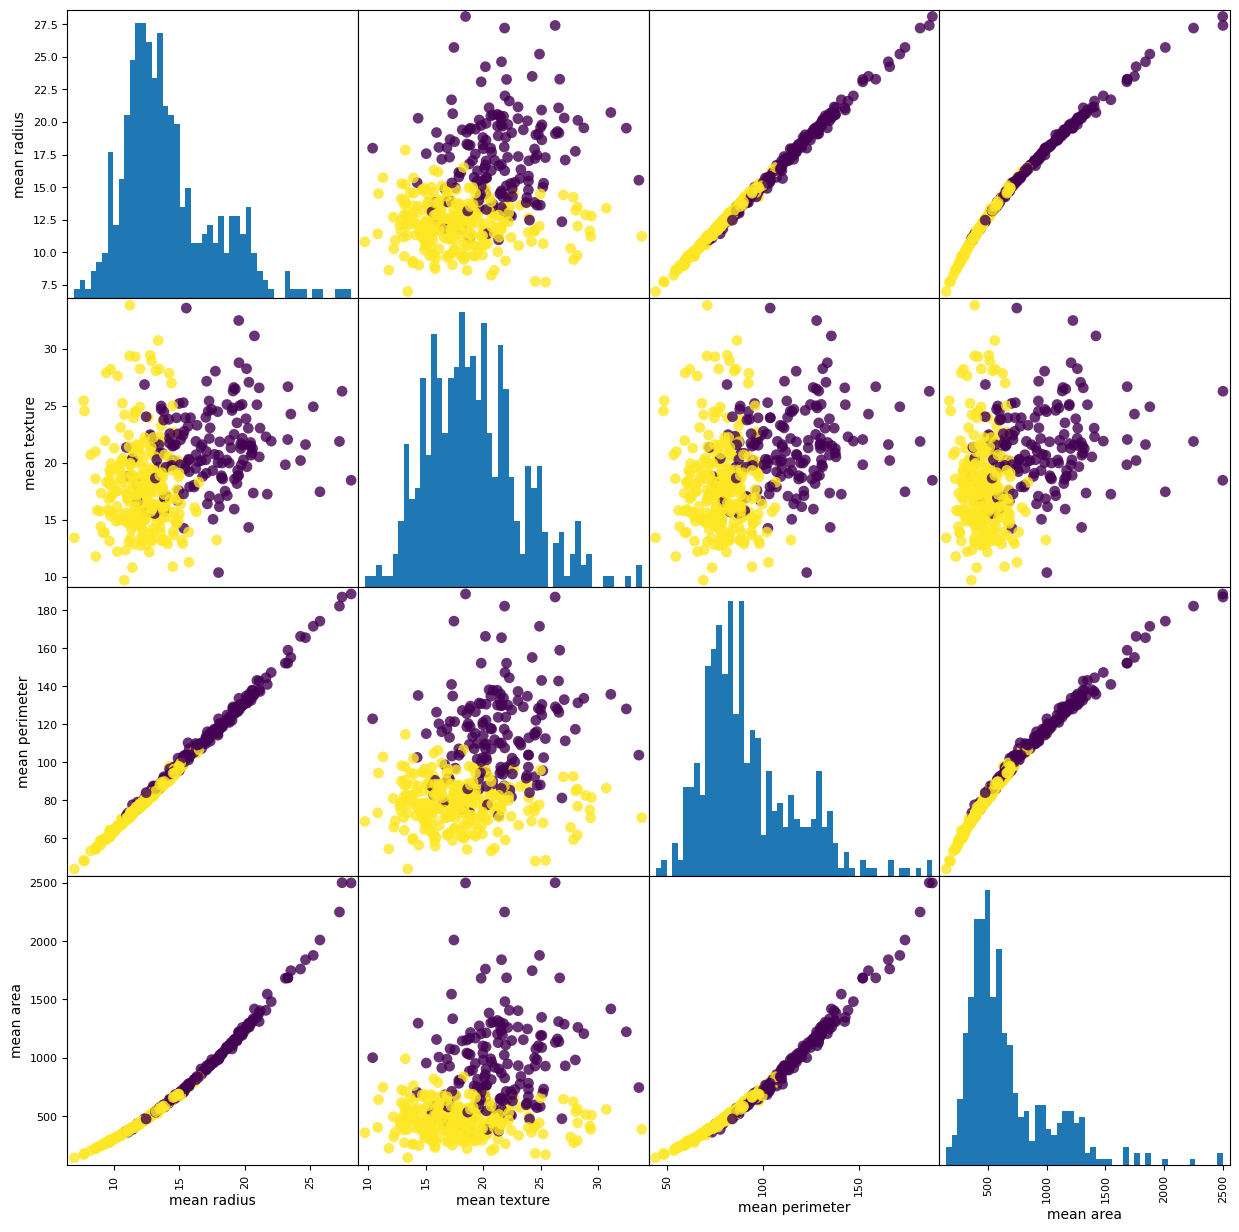

In [130]:
cancer_dataframe = pd.DataFrame(X_train[:,:4], columns = cancer.feature_names[:4])
grr = pd.plotting.scatter_matrix(cancer_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 50}, s=60, alpha=.8)

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [132]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [135]:
X_new = np.array([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,22,24,25,26,27,28,29,30]])
print("Форма массива X_new: {}".format(X_new.shape))

Форма массива X_new: (1, 30)


In [136]:
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
print("Спрогнозированнная метка: {}".format(cancer['target_names'][prediction]))

Прогноз: [1]
Спрогнозированнная метка: ['benign']


In [137]:
y_pred = knn.predict(X_test)
print("Прогнозы для тестового набора:\n {}".format(y_pred))

Прогнозы для тестового набора:
 [1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [138]:
print("Правильность на тестовом наборе: {:.2f}".format(np.mean(y_pred == y_test)))

Правильность на тестовом наборе: 0.92


In [139]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92
